In [24]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.model_selection import train_test_split


np.set_printoptions(suppress=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:

def load_data(name , label):
    return  pickle.load(open(name,'rb')) , pickle.load(open(label,'rb'))

def split_data(X,y):
    X_train , X_test , y_train , y_test = train_test_split(np.array(X) , np.array(y) , test_size=0.2)
    return X_train , X_test , y_train , y_test

def recale(X_train , X_test):
    return X_train / 255 , X_test / 255


def visual_graph(history):

    plt.figure(figsize=(12,5.5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],color='b',label='Training')
    plt.plot(history.history['val_loss'],color='r',label='val_Training')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],color='b',label='Training')
    plt.plot(history.history['val_accuracy'],color='r',label='val_Training')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()
    return

def visulize_confusion(model , X_test , y_test , class_name):
    # y_pred = np.where(model.predict(X_test) >0.5 , 1,0)
    y_pred = np.argmax(model.predict(X_test) , axis=1)
    cm = confusion_matrix(y_test , y_pred)

    plt.figure(figsize=(9, 7))

    # Create the confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

    # Plot the confusion matrix
    disp.plot(cmap='viridis', ax=plt.gca())

    # Make the labels italic and rotated
    plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", fontstyle='italic')
    plt.setp(plt.gca().get_yticklabels(), fontstyle='italic')

    # Display the plot
    plt.show()


def evaluate_model(model , X_tset , y_test):
  loss , accuracy = model.evaluate(X_test , y_test)
  print('loss:',loss )
  print('Accuracy: ',accuracy)

# วิธีเขียนแบบทั่วไป #
global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()
average_pooling = global_average_pooling_layer(base_model.output)

# วิธีเขียนแบบ chain #
average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [26]:
# Load base model
def train(X_train , y_train , X_test , y_test):
    base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3) ,
                                                   include_top=False,
                                                   weights='imagenet')
    base_model.trainable = False

    # Flatten layer
    average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    # Output layer
    prediction_layer = tf.keras.layers.Dense(units=4 , activation='softmax')(average_pooling)
    # Custom head
    model = tf.keras.models.Model(inputs=base_model.input , outputs=prediction_layer)

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train , y_train , validation_data=(X_test , y_test),
                        batch_size=128,
                        verbose=1,
                        epochs=25)
    return history , model

In [27]:
# Main call function
path_feature = '/content/drive/MyDrive/Project/data/feature_rgb.pickle'
path_label = '/content/drive/MyDrive/Project/data/label_rgb.pickle'
X , y = load_data(path_feature , path_label)
X_train , X_test , y_train , y_test = split_data(X,y)
X_train , X_test = recale(X_train , X_test)
history , model = train(X_train , y_train , X_test , y_test)

Epoch 1/25
26/26 [==============================] - 6s 136ms/step - loss: 1.3660 - accuracy: 0.3727 - val_loss: 1.1454 - val_accuracy: 0.5264
Epoch 2/25
26/26 [==============================] - 2s 68ms/step - loss: 1.0138 - accuracy: 0.6143 - val_loss: 0.9317 - val_accuracy: 0.6593
Epoch 3/25
26/26 [==============================] - 2s 80ms/step - loss: 0.8261 - accuracy: 0.7211 - val_loss: 0.7657 - val_accuracy: 0.7368
Epoch 4/25
26/26 [==============================] - 2s 68ms/step - loss: 0.6809 - accuracy: 0.7802 - val_loss: 0.6349 - val_accuracy: 0.7884
Epoch 5/25
26/26 [==============================] - 2s 68ms/step - loss: 0.5686 - accuracy: 0.8283 - val_loss: 0.5320 - val_accuracy: 0.8426
Epoch 6/25
26/26 [==============================] - 2s 81ms/step - loss: 0.4791 - accuracy: 0.8652 - val_loss: 0.4498 - val_accuracy: 0.8696
Epoch 7/25
26/26 [==============================] - 2s 84ms/step - loss: 0.4108 - accuracy: 0.8892 - val_loss: 0.3893 - val_accuracy: 0.8942
Epoch 8/25
2

102/102 [==============================] - 2s 17ms/step


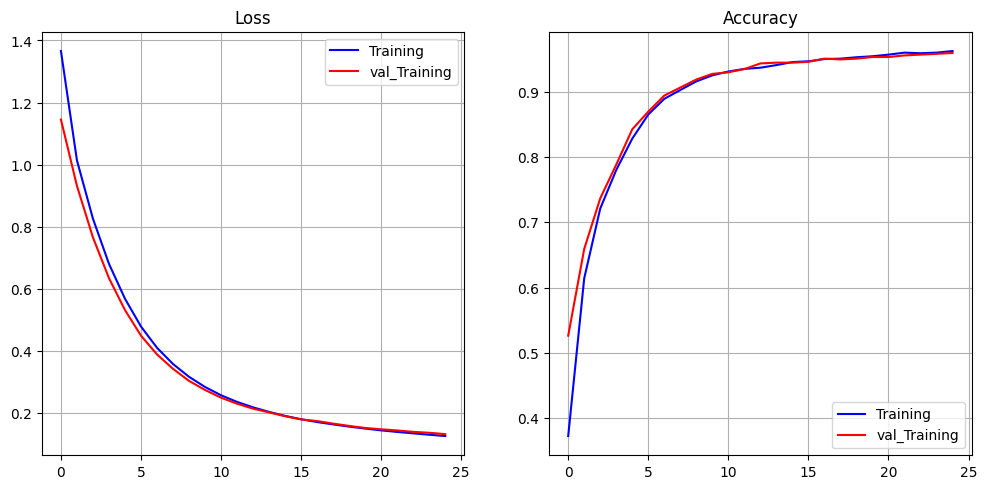

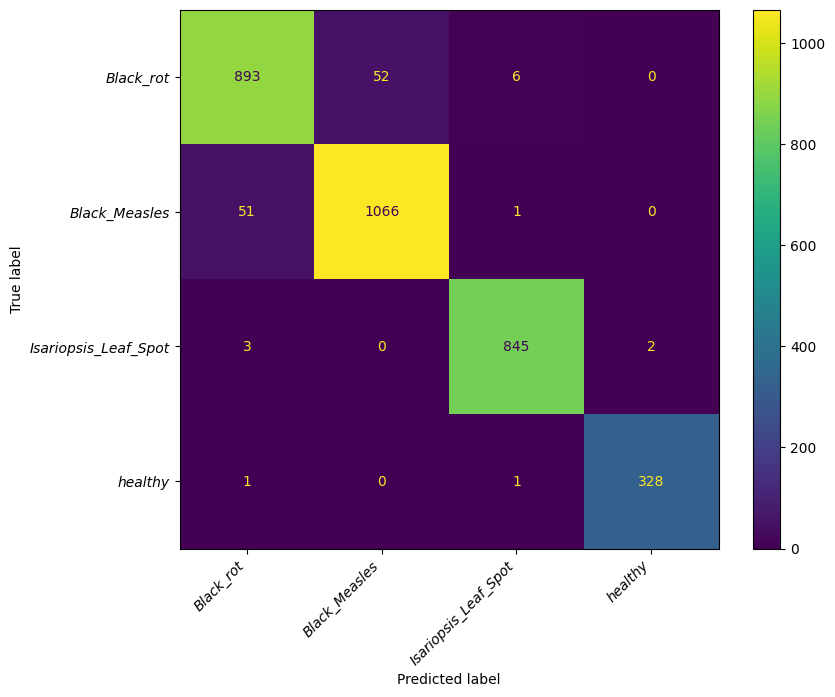

In [58]:
display_labels=['Black_rot','Black_Measles','Isariopsis_Leaf_Spot','healthy']
visual_graph(history)
visulize_confusion(model , X_train , y_train,display_labels)



In [45]:
evaluate_model(model , X_test , y_test)

26/26 [==============================] - 1s 22ms/step - loss: 0.1328 - accuracy: 0.9594
loss: 0.13276119530200958
Accuracy:  0.9594095945358276
